In [23]:
import time
import glob, os, os.path
import h5py
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam
from keras.models import Model

pathFiles = "/home/atilla/Documents/DeepLearning/Test/"
os.chdir(pathFiles)




In [2]:
file_name = 'V2_'
detail = 'compact_rand_norm_cate'
files = [file for file in glob.glob("*.hdf5") if file_name+detail in file]
f = h5py.File(files[0])
dataset_x = f['data_x'][...]
dataset_y = f['data_y'][...]
print (dataset_x.shape, dataset_y.shape, len(dataset_x))



# 2 Divide into train, test, validate


length = len(dataset_x)
length_train = int(round(0.8*length))
length_test = int(round(0.2*length))
#length_valid = int(round(0.2*length))
print(length_train, length_test)

train_data_x = dataset_x[0:length_train]
train_data_y = dataset_y[0: length_train]
test_data_x = dataset_x[length_train: length_train+length_test+1]
test_data_y = dataset_y[length_train: length_train+length_test+1]
# valid_data_x = dataset_x[length_train+length_test:length_train+length_test+ length_valid+1]
# valid_data_y = dataset_y[length_train+length_test:length_train+length_test+ length_valid+1]

print(test_data_x.shape, train_data_x.shape)#, valid_data_x.shape)

# 3. Import libraries and modules
import numpy as np
np.random.seed(123)  # for reproducibility




(625, 2, 30, 360) (625, 361) 625
500 125
(125, 2, 30, 360) (500, 2, 30, 360)


(30, 360)


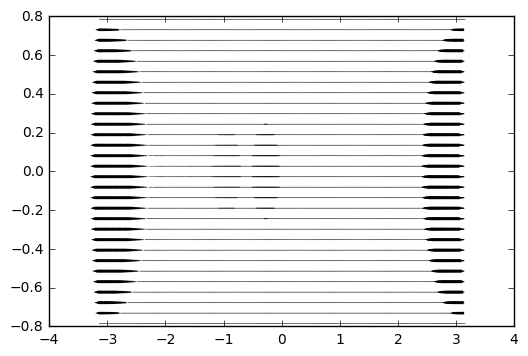

In [3]:
fov_x  = np.pi #half FOV along azimuth in radians
fov_y = np.pi/4 # half FOV along elevation in radians
res_x = 360 #amount of pixels along azimuth
res_y = 30 # amount of pixels along elevation



phis   = np.linspace(-fov_x, fov_x, res_x)
thetas = np.linspace(-fov_y, fov_y, res_y)


layout = np.array([[phi, theta] 
                   for theta in thetas
                   for phi in phis])

ofx = train_data_x[40][0]
ofy = train_data_y[40][1]
plt.quiver(layout[:,0], layout[:,1], 
           ofx, ofy)
print(ofx.shape)

(5,)


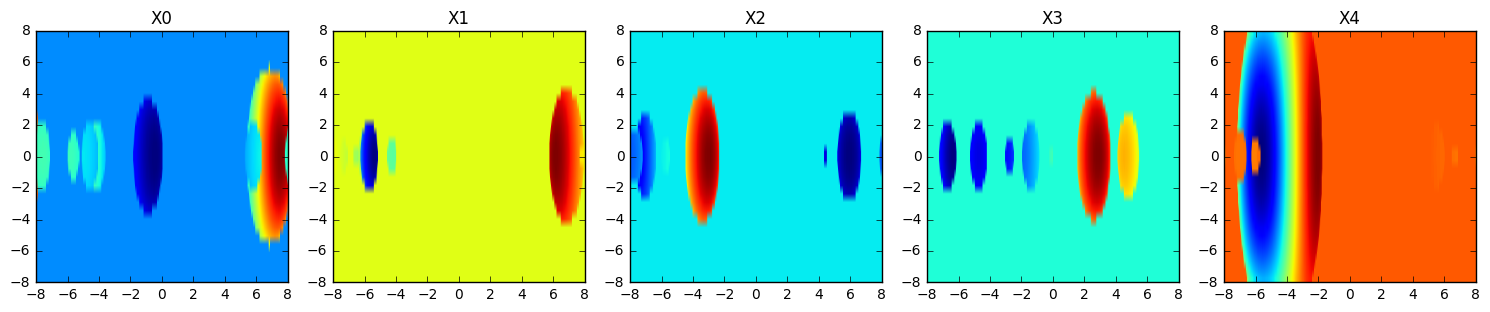

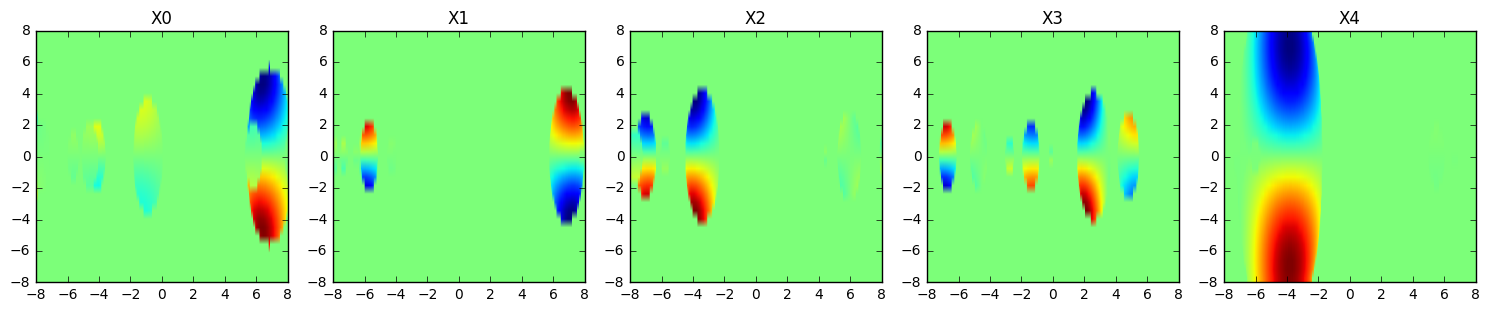

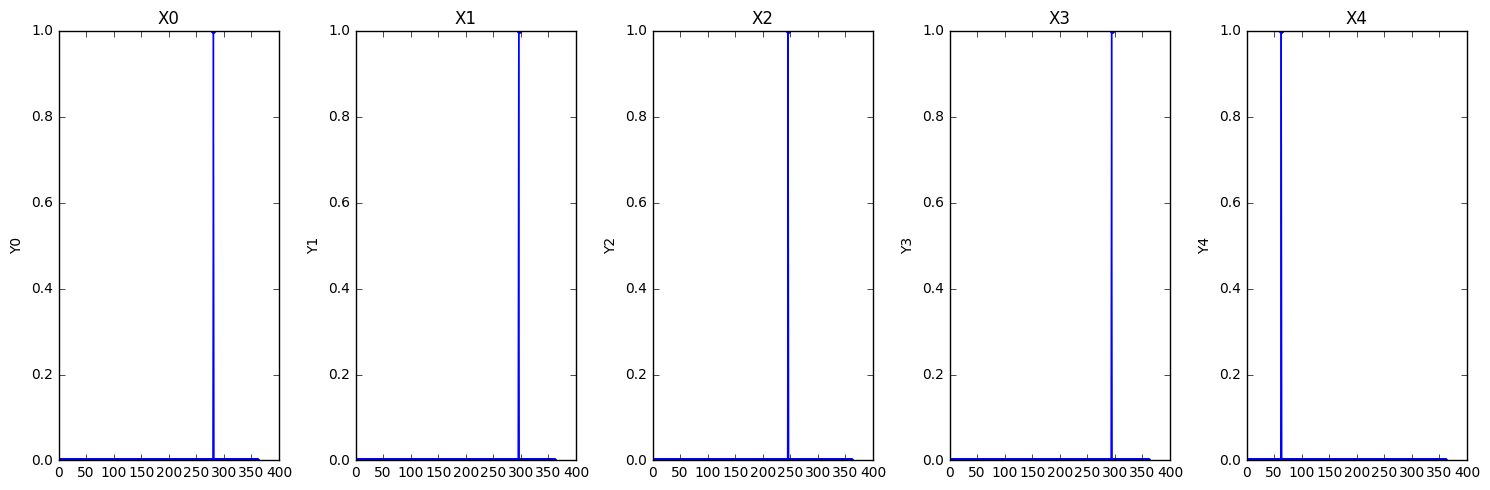

In [4]:
# Display some input
fig, axarr = plt.subplots(figsize=[15, 5],
                          nrows=1, ncols=5,
                          sharex='col')
print(axarr.shape)
for i in range(axarr.shape[0]):
    ax = axarr[i]
    ofx = train_data_x[i][0]
    ofy = train_data_x[i][1]
#     ax.quiver(layout[:,0], layout[:,1], 
#            ofx, ofy)
    ax.imshow(ofx, extent =[-8,8,-8,8], origin='lower')
    ax.set_title('X' + str(i))    
fig.tight_layout()

fig, axarr = plt.subplots(figsize=[15, 5],
                          nrows=1, ncols=5,
                          sharex='col')
for i in range(axarr.shape[0]):
    ax = axarr[i]
    ofx = train_data_x[i][0]
    ofy = train_data_x[i][1]
#     ax.quiver(layout[:,0], layout[:,1], 
#            ofx, ofy)
    ax.imshow(ofy, extent =[-8,8,-8,8])
    ax.set_title('X' + str(i))    
fig.tight_layout()

fig, axarr = plt.subplots(figsize=[15, 5],
                          nrows=1, ncols=5,
                          sharex='col')
for i in range(axarr.shape[0]):
    ax = axarr[i]
    ax.set_title('X' + str(i))
   # ax.set_ylim(0, 30)
    ax.plot(train_data_y[i], '.-')
    #ax = axarr[1, i]
#     ax.plot(Y_train[i], '.-')
    ax.set_ylabel('Y' + str(i))
   # ax.set_xlim(0, 360)
    
fig.tight_layout()


In [24]:
batch_size = 12
num_classes = 1
epochs = 5

# x and y dimensions of input images
shapex, shapey = 360, 30
# number of convolutional filters to use
num_filters = 32
# side length of maxpooling square
num_pool = 2
# side length of convolution square
num_conv = 3


TypeError: add() got an unexpected keyword argument 'name'

In [25]:

# 7. Define model architecture
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(2,30,360), dim_ordering = 'th'))
model.add(Convolution2D(16, 3, 3,dim_ordering = 'th', activation='relu'))#, input_shape=(2,30,360)))
model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
model.add(Convolution2D(32, 3, 3,dim_ordering = 'th', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
model.add(Convolution2D(32, 3, 3, dim_ordering= 'th', activation='relu'))
model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
model.add(Convolution2D(64, 3, 3, dim_ordering = 'th', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
# model.add(Convolution2D(64, 3, 3, dim_ordering= 'th', activation='relu'))
# model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
# model.add(Convolution2D(128, 3, 3, dim_ordering = 'th', activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(361, activation='softmax'))



# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='softmax'))
# 8. Compile model
# model.compile(loss='_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-4), metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()



____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
zeropadding2d_12 (ZeroPadding2D) (None, 2, 32, 362)    0           zeropadding2d_input_3[0][0]      
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 16, 30, 360)   304         zeropadding2d_12[0][0]           
____________________________________________________________________________________________________
zeropadding2d_13 (ZeroPadding2D) (None, 16, 32, 362)   0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 32, 30, 360)   4640        zeropadding2d_13[0][0]           
___________________________________________________________________________________________

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 2, 30, 360)    0                                            
____________________________________________________________________________________________________
zero_1 (ZeroPadding2D)           (None, 2, 32, 362)    0           main_input[0][0]                 
____________________________________________________________________________________________________
conv_1 (Convolution2D)           (None, 16, 30, 360)   304         zero_1[0][0]                     
____________________________________________________________________________________________________
zero_2 (ZeroPadding2D)           (None, 16, 32, 362)   0           conv_1[0][0]                     
___________________________________________________________________________________________

In [11]:
from keras import backend as K

# this is a placeholder tensor that will contain our generated images
first_layer = model.layers[0]
input_img = first_layer.input

In [51]:

# 8.2 Save model 

checkpointer = ModelCheckpoint(filepath = "/home/atilla/Documents/DeepLearning/Test/weights.hdf5", verbose = 1, save_best_only = True)

# 9. Fit model on training data
model.fit(train_data_x, train_data_y,
          batch_size=10, nb_epoch=epochs, verbose=1, validation_split = 0.2,  callbacks =[checkpointer] )

# 10. Evaluate model on test data
score = model.evaluate(test_data_x, test_data_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

model.save('/home/atilla/Documents/DeepLearning/Test/model1.hdf5')

Train on 400 samples, validate on 100 samples
Epoch 1/5
400/400 [==============================] - 61s - loss: 5.9172 - acc: 0.0000e+00 - val_loss: 5.8316 - val_acc: 0.0200
Epoch 2/5
400/400 [==============================] - 61s - loss: 5.7823 - acc: 0.0050 - val_loss: 5.6814 - val_acc: 0.0300
Epoch 3/5
400/400 [==============================] - 62s - loss: 5.5819 - acc: 0.0175 - val_loss: 5.4061 - val_acc: 0.0600
Epoch 4/5
400/400 [==============================] - 63s - loss: 5.2417 - acc: 0.0450 - val_loss: 5.0545 - val_acc: 0.1200
Epoch 5/5
400/400 [==============================] - 62s - loss: 4.9721 - acc: 0.0500 - val_loss: 4.6824 - val_acc: 0.1400
acc: 12.80%


In [ ]:

# # 8.2 Save model 

# checkpointer = ModelCheckpoint(filepath = "/home/ajv/Desktop/DroneAI/weights.hdf5", verbose = 1, save_best_only = True)

# # 9. Fit model on training data
# model.fit(train_data_x, train_data_y,
#           batch_size=10, nb_epoch=epochs, verbose=1, validation_split = 0.2,  callbacks =[checkpointer] )

# # 10. Evaluate model on test data
# score = model.evaluate(test_data_x, test_data_y, verbose=0)
# print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

# model.save('/home/ajv/Desktop/DroneAI/model1.hdf5')

# Visualize what the model predicts

What can be observed, is that the model will spit out a vector with a lot of values. Will be interesting to see how close it gets when the model is better trained.



[]

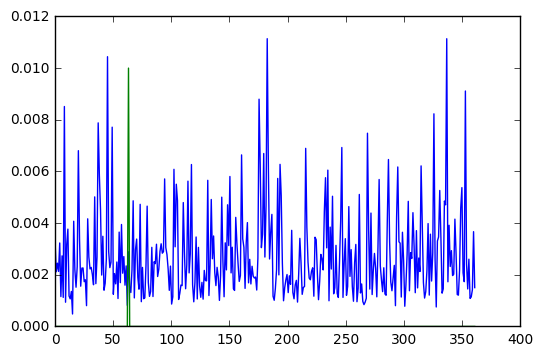

In [83]:
y = model.predict(train_data_x[0:5])
y1 = train_data_y[0:5] 
t = np.linspace(0,361, 361, endpoint = True)
plt.plot(t,y[4], t, y1[4]/100)
plt.plot()

In [62]:
from keras.layers import Input, Dense, Flatten
from keras.models import Model

Bottom_dense=True
# 7. Define model architecture
#model = Sequential()
inputs = Input(shape =(2,30,360), name = 'main_input' )
x =ZeroPadding2D((1,1), dim_ordering = 'th', name ='zero_1') (inputs)
x = Convolution2D(16, 3, 3,dim_ordering = 'th', activation='relu', name = 'conv_1')(x)
x =ZeroPadding2D((1,1), dim_ordering = 'th', name = 'zero_2')(x)
x =Convolution2D(32, 3, 3,dim_ordering = 'th', activation='relu', name = 'conv_2')(x)
x= MaxPooling2D((2,2), strides=(2,2), name = 'max_1')(x)
x =ZeroPadding2D((1,1), dim_ordering = 'th', name= 'zero_3')(x)
x= Convolution2D(32, 3, 3, dim_ordering= 'th', activation='relu', name = 'conv_3')(x)
x= ZeroPadding2D((1,1), dim_ordering = 'th', name = 'zero_4')(x)
x=Convolution2D(64, 3, 3, dim_ordering = 'th', activation='relu', name = 'conv_4')(x)
x=MaxPooling2D((2,2), strides=(2,2), name= 'max_2')(x)

# model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
# model.add(Convolution2D(64, 3, 3, dim_ordering= 'th', activation='relu'))
# model.add(ZeroPadding2D((1,1), dim_ordering = 'th'))
# model.add(Convolution2D(128, 3, 3, dim_ordering = 'th', activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))


x =Flatten(name = 'flatten_1')(x)
if Bottom_dense == True :
    x =Dense(128, activation='relu', name = 'dense_1')(x)
    x=Dropout(0.5, name = 'drop_1')(x)
    x = Dense(128, activation='relu', name = 'dense_2')(x)
    x = Dropout(0.5, name = 'drop_2')(x)
    x=Dense(361, activation='softmax', name = 'dense_3')(x)

model2 = Model(inputs, x, name= 'simple_model')

# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dense(30, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(1, activation='softmax'))
# 8. Compile model
# model.compile(loss='_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer=adam(lr=1e-4), metrics=['accuracy'])
#model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model2.summary()


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 2, 30, 360)    0                                            
____________________________________________________________________________________________________
zero_1 (ZeroPadding2D)           (None, 2, 32, 362)    0           main_input[0][0]                 
____________________________________________________________________________________________________
conv_1 (Convolution2D)           (None, 16, 30, 360)   304         zero_1[0][0]                     
____________________________________________________________________________________________________
zero_2 (ZeroPadding2D)           (None, 16, 32, 362)   0           conv_1[0][0]                     
___________________________________________________________________________________________

In [63]:

# 8.2 Save model 

checkpointer = ModelCheckpoint(filepath = "/home/atilla/Documents/DeepLearning/Test/weights.hdf5", verbose = 1, save_best_only = True)

# 9. Fit model on training data
model.fit(train_data_x, train_data_y,
          batch_size=10, nb_epoch=epochs, verbose=1, validation_split = 0.2,  callbacks =[checkpointer] )

# 10. Evaluate model on test data
score = model.evaluate(test_data_x, test_data_y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

model.save('/home/atilla/Documents/DeepLearning/Test/model1.hdf5')

Train on 400 samples, validate on 100 samples
Epoch 1/5
400/400 [==============================] - 69s - loss: 5.8610 - acc: 0.0100 - val_loss: 5.7181 - val_acc: 0.0400
Epoch 2/5
400/400 [==============================] - 66s - loss: 5.6824 - acc: 0.0175 - val_loss: 5.4923 - val_acc: 0.0800
Epoch 3/5
400/400 [==============================] - 66s - loss: 5.4293 - acc: 0.0350 - val_loss: 5.1101 - val_acc: 0.1300
Epoch 4/5
400/400 [==============================] - 65s - loss: 5.0516 - acc: 0.0550 - val_loss: 4.7516 - val_acc: 0.1500
Epoch 5/5
400/400 [==============================] - 68s - loss: 4.6875 - acc: 0.0725 - val_loss: 4.5179 - val_acc: 0.2500
acc: 26.40%


In [81]:
layer_dict = dict([(layer.name, layer) for layer in model2.layers[0:11]])
print(layer_dict)
for i, layername in enumerate(layer_dict):
    print(i, layername)

names = model2.get_layer('dense_3')
print(names)

{'zero_4': <keras.layers.convolutional.ZeroPadding2D object at 0x7f3956304390>, 'conv_4': <keras.layers.convolutional.Convolution2D object at 0x7f3956270898>, 'max_2': <keras.layers.pooling.MaxPooling2D object at 0x7f3956270c50>, 'conv_1': <keras.layers.convolutional.Convolution2D object at 0x7f3958d06400>, 'conv_2': <keras.layers.convolutional.Convolution2D object at 0x7f3958df3dd8>, 'zero_1': <keras.layers.convolutional.ZeroPadding2D object at 0x7f3956a5b438>, 'conv_3': <keras.layers.convolutional.Convolution2D object at 0x7f395907ddd8>, 'max_1': <keras.layers.pooling.MaxPooling2D object at 0x7f3958d10208>, 'zero_2': <keras.layers.convolutional.ZeroPadding2D object at 0x7f3958d06eb8>, 'zero_3': <keras.layers.convolutional.ZeroPadding2D object at 0x7f39562fd8d0>}
0 zero_4
1 conv_4
2 max_2
3 conv_1
4 conv_2
5 zero_1
6 conv_3
7 max_1
8 zero_2
9 zero_3


In [105]:
from keras import backend as K

# this is a placeholder tensor that will contain our generated images
#first_layer = model.layers[0]
# input_img =model.input
# (type(input_img))

first_layer = model.layers[0]
input_img = first_layer.input
type(input_img)

tensorflow.python.framework.ops.Tensor

In [102]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
#     x -= x.mean()
#     x /= (x.std() + 1e-5)
#     x *= 0.1

    # clip to [0, 1]
#     x += 0.5
#     x = np.clip(x, 0, 1)

    # convert to RGB array
#     x *= 255
    x = x.transpose((0, 1))
#     x = np.clip(x, 0, 255).astype('uint8')
    return x

In [107]:
# build a loss function that maximizes the activation
layer_name = 'zero_1'
layer_output = layer_dict[layer_name].output

# fig, axarr = plt.subplots(figsize=[15, 5],
#                           ncols=6)

# for output_index in range(6):
#     filter_index = 2 # can be any integer from 0 to 511, as there are 512 filters in that layer
    # of the nth filter of the layer considered
    # layer_output = layer_dict[layer_name].output
#     loss = K.mean(layer_output[:, output_index, :, :])
loss = K.mean(layer_output[:, 0, :, :])
print(layer_output[:,0,:,:], input_img)
# compute the gradient of the input picture wrt this loss
grads = K.gradients(loss, input_img)[0]

print(loss, grads, input_img)
# normalization trick: we normalize the gradient
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# this function returns the loss and grads given the input picture
iterate = K.function([input_img], [loss, grads])

# we start from a gray image with some noise
# input_img_data = np.zeros((1, 28, 28)) 
input_img_data = np.random.random((2, 30, 360)) * 0.5
step = 1.0
# run gradient ascent for 20 steps
for i in range(10):
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value * step
print(loss_value)

img = input_img_data[0]
img = deprocess_image(img)

#     ax = axarr[output_index]
#     ax.imshow(img)
#     ax.set_title('Filter ' + str(output_index))

Tensor("strided_slice_53:0", shape=(?, 2, 32), dtype=float32) Tensor("main_input_9:0", shape=(?, 2, 30, 360), dtype=float32)
Tensor("Mean_74:0", shape=(), dtype=float32) None Tensor("main_input_9:0", shape=(?, 2, 30, 360), dtype=float32)


ValueError: None values not supported.

In [90]:
K.gradients?